# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 25px; color: #2D2926; text-align: center; line-height: 0.75;background-color: #41dcf7"><b>House Prices - Advanced Regression Techniques</b><br></h1>

### Competition Description:
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Links:

[House Prices - Advanced Regression Techniques (Kaggle)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

[Based on this notebook](https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1/notebook?scriptVersionId=12846740)


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Data Preprocessing/Information</div></center>

### Importing Libraries:

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split #, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Training Data Reading
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
0,99.520548,96.30137,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.60274,2.60274,2.534247,2.534247,2.534247,0.547945,0.547945,0.068493


<AxesSubplot:>

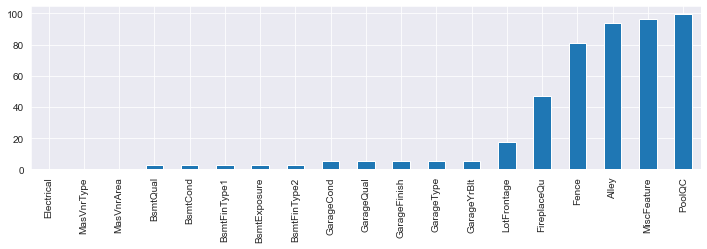

In [3]:
# Columns with NaN
aux = (df_train.isna().sum() > 0)
display((df_train.loc[: , aux].isna().sum()*100/df_train.shape[0]).sort_values(ascending=False).to_frame().T)
fig, ax = plt.subplots(figsize=(12, 3))
(df_train.loc[: , aux].isna().sum()*100/df_train.shape[0]).sort_values().plot.bar()

In [4]:
#Testing Data Reading
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageYrBlt,GarageQual,GarageFinish,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageCars,GarageArea,TotalBsmtSF,KitchenQual,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
0,99.79438,96.504455,92.66621,80.123372,50.03427,15.558602,5.346127,5.346127,5.346127,5.346127,5.209047,3.084304,3.015764,3.015764,2.878684,2.878684,1.096642,1.028101,0.27416,0.13708,0.13708,0.13708,0.13708,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854


<AxesSubplot:>

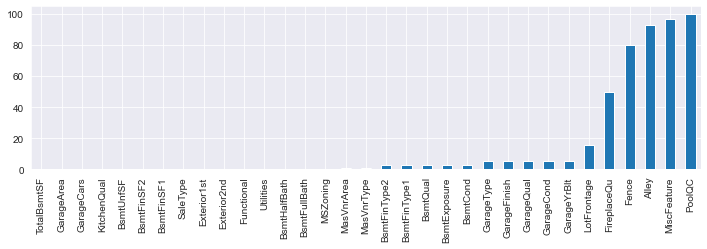

In [5]:
# Columns with NaN
aux1 = (df_test.isna().sum() > 0)
display((df_test.loc[: , aux1].isna().sum()*100/df_test.shape[0]).sort_values(ascending=False).to_frame().T)
fig, ax = plt.subplots(figsize=(12, 3))
(df_test.loc[: , aux1].isna().sum()*100/df_test.shape[0]).sort_values().plot.bar()

### Data info:

In [6]:
#Gropping the df_train + df_test
df_all = pd.concat([df_train, df_test]).reset_index(drop=True)

#Selecting the obj columns and the others
cols_obj = df_all.select_dtypes('object').columns
cols_others = df_all.columns.difference(cols_obj)

print('Object Columns:')
display(df_all[cols_obj].describe())
print('\n')
print('Other Columns:')
display(df_all[cols_others].describe())

Object Columns:


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402




Other Columns:


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2760.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2896.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,0.597122,1.568003,472.874572,1.766621,1978.113406,1500.759849,0.380267,1460.000000,1.044536,10168.114080,69.305795,4.694416,57.137718,102.201312,50.825968,6.213087,47.486811,5.564577,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,0.646129,0.552969,215.394815,0.761624,25.574285,506.051045,0.502872,842.787043,0.214462,7886.996359,23.344905,46.396825,42.517628,179.334253,567.402211,2.714762,67.575493,1.113131,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,0.000000,1.000000,0.000000,1300.000000,21.000000,0.000000,20.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1126.000000,0.000000,730.500000,1.000000,7478.000000,59.000000,0.000000,20.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,1.000000,2.000000,480.000000,2.000000,1979.000000,1444.000000,0.000000,1460.000000,1.000000,9453.000000,68.000000,0.000000,50.000000,0.000000,0.000000,6.000000,26.000000,5.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.500000,1.000000,2189.500000,1.000000,11570.000000,80.000000,0.000000,70.000000,164.000000,0.000000,8.000000,70.000000,6.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5642.000000,2.000000,2919.000000,3.000000,215245.000000,313.000000,1064.000000,190.000000,1600.000000,17000.000000,12.000000,742.000000,9.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Correlation Graph:

Using the method='spearman' to calculate the correlation between variables its possbile to check no-linear relationship. 

<AxesSubplot:>

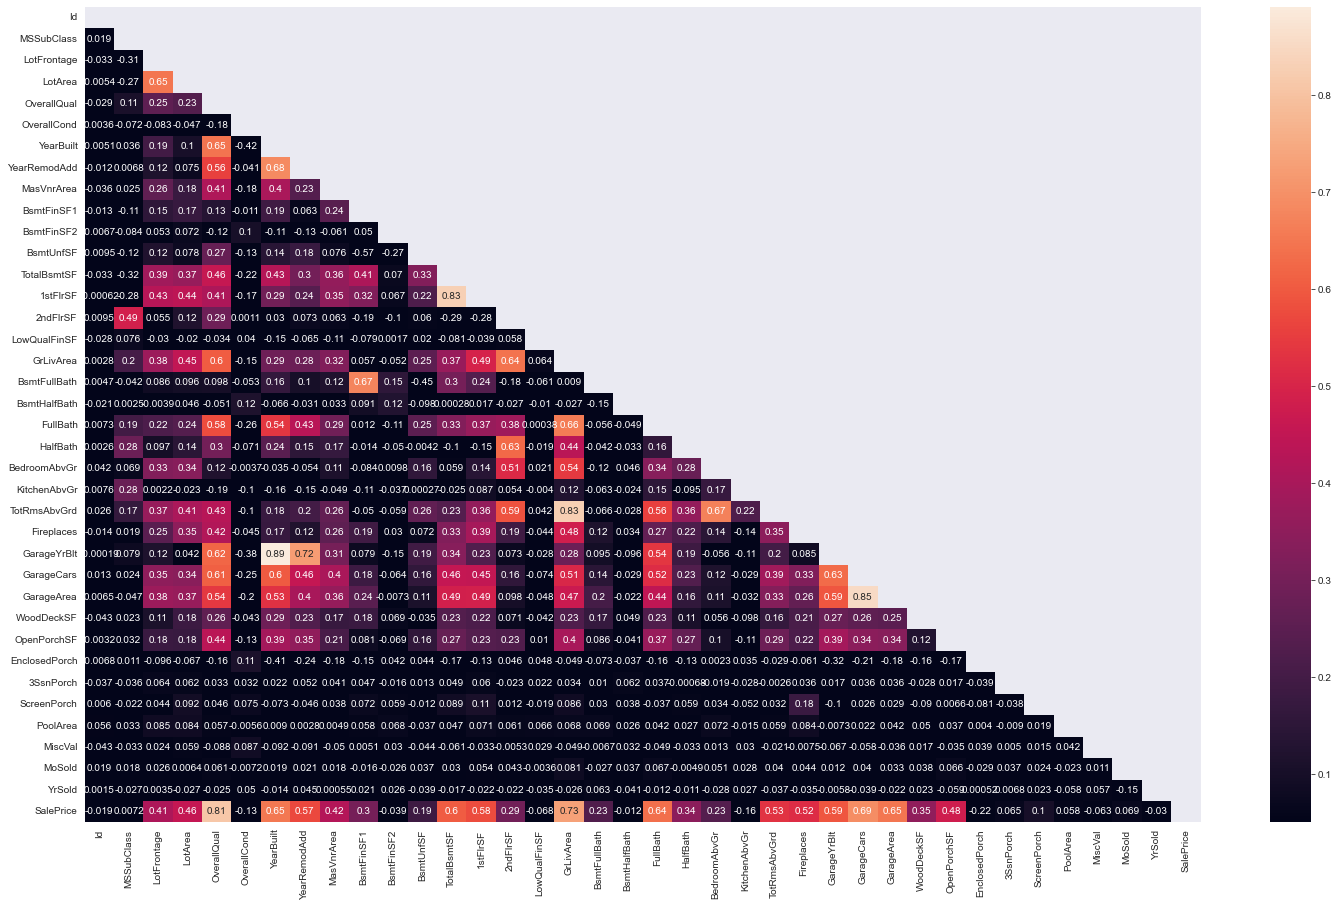

In [8]:
coors = df_train.corr(method='spearman')
mask = np.zeros_like(coors, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(coors, mask=mask, vmin=0.05, annot=True)


 - Dropping highly correlated columns is important to avoid introducing multicollinearity in the model, which can lead to imprecise and less reliable results. Highly correlated columns can also introduce redundant information, which can negatively affect the accuracy and interpretability of the model.
 
GarageYrBlt - YearBuilt --> corr=0.89
 
TotRmsAbvGrd - GrLivArea --> corr=0.83

GarageCars - GarageArea --> corr=0.85

1stFlrSF - TotalBsmtSF --> coor=0.83

 

<AxesSubplot:title={'center':'Correlation Graph (SalesPrice - Features)'}>

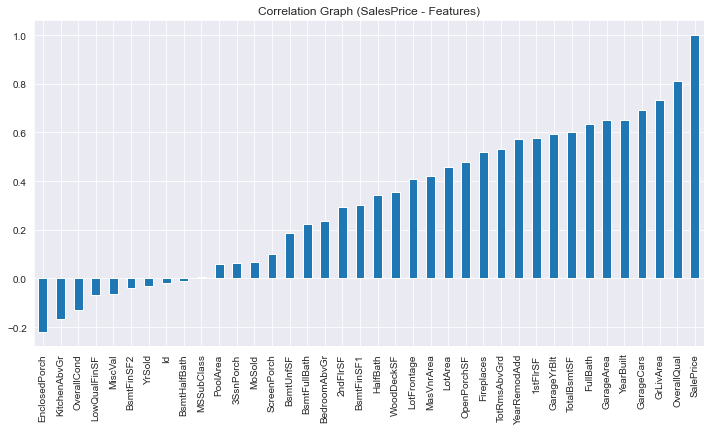

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Correlation Graph (SalesPrice - Features)')
coors.SalePrice.sort_values().plot.bar()

### Cheking the variables distribuition:

If the variables have a Shapiro p-value > 0.05, it is considered normally distributed.

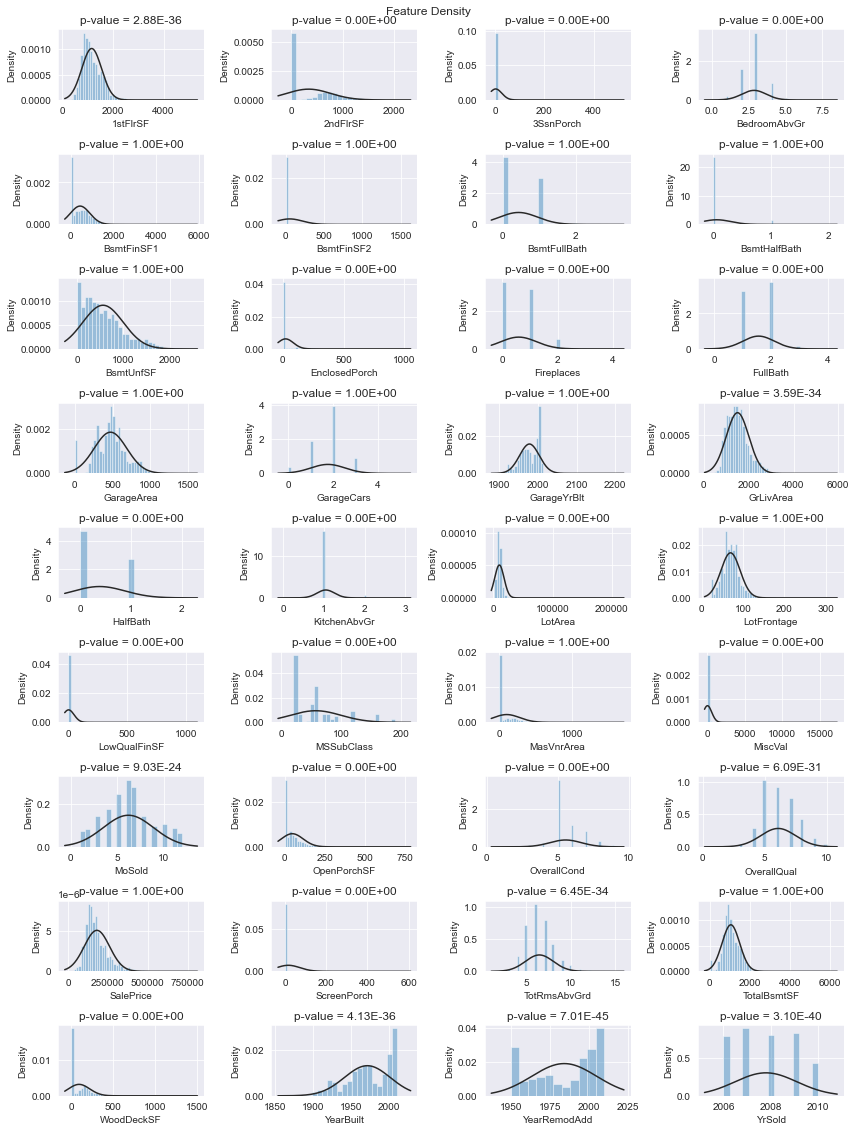

In [10]:
fig, ax = plt.subplots(nrows=9, ncols=4, figsize=(12, 16))
fig.suptitle('Feature Density')

cols_plot = cols_others.tolist(); cols_plot.remove('Id'); cols_plot.remove('PoolArea')
for i, name in enumerate(cols_plot):
    plt.subplot(9,4,i+1)
    sns.distplot(df_all[name], kde=False, fit=stats.norm)
    plt.ylabel('Density')
    plt.title(f'p-value = {stats.shapiro(df_all[name]).pvalue:.2E}')
fig.tight_layout()

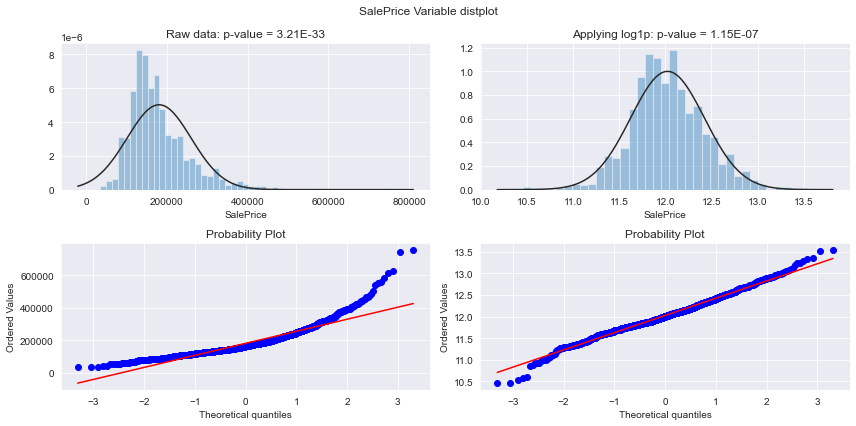

In [11]:
# Dependent variable
y = df_all['SalePrice'].dropna()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('SalePrice Variable distplot')

ax[0,0].set_title(f'Raw data: p-value = {stats.shapiro(y).pvalue:.2E}')
sns.distplot(y, kde=False, fit=stats.norm, ax=ax[0,0])

ax[0,1].set_title(f'Applying log1p: p-value = {stats.shapiro(np.log1p(y)).pvalue:.2E}')
sns.distplot(np.log1p(y), kde=False, fit=stats.norm, ax=ax[0,1])

ax[1,0].set_title(f'Applying log1p: p-value = {stats.shapiro(np.log1p(y)).pvalue:.2E}')
stats.probplot(y, plot=ax[1,0])

ax[1,1].set_title(f'Applying log1p: p-value = {stats.shapiro(np.log1p(y)).pvalue:.2E}')
stats.probplot(np.log1p(y), plot=ax[1,1])

fig.tight_layout()

In [12]:
#Cheking normal distribution
Test_shapiro = lambda x: stats.shapiro(x.fillna(x.median())).pvalue > 0.01
df_train[cols_others].apply(Test_shapiro)

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
BedroomAbvGr     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtFullBath     False
BsmtHalfBath     False
BsmtUnfSF        False
EnclosedPorch    False
Fireplaces       False
FullBath         False
GarageArea       False
GarageCars       False
GarageYrBlt      False
GrLivArea        False
HalfBath         False
Id               False
KitchenAbvGr     False
LotArea          False
LotFrontage      False
LowQualFinSF     False
MSSubClass       False
MasVnrArea       False
MiscVal          False
MoSold           False
OpenPorchSF      False
OverallCond      False
OverallQual      False
PoolArea         False
SalePrice        False
ScreenPorch      False
TotRmsAbvGrd     False
TotalBsmtSF      False
WoodDeckSF       False
YearBuilt        False
YearRemodAdd     False
YrSold           False
dtype: bool

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Below are all the feature engineering steps applied to the raw dataset:
- Some features had their NaN values filled with the mode, median or another value such as 'None'.
- A function (obj_to_cat) was created to convert categorical features into dummy variables, taking into account the SalePrice value.
- All the features with non-Gaussian distribution were transformed using boxcox1p transformation.
- One-hot encoding was applied.

In [13]:
def obj_to_cat(df, features):
    for feature in features:
        ordering = df.groupby(feature)['SalePrice'].mean().sort_values().reset_index()
        ordering[feature+'_E'] = ordering.index + 1
        df[feature+'_E'] = df.merge(ordering[[feature, feature+'_E']], 
                                         on=feature, how='left')[feature+'_E']
    return df
def col_to_boxcol(df, features):

    for feature in features:
        #print(feature)
        if df[feature].skew() > 0.5:
            
            df[feature] = boxcox1p(df[feature], boxcox_normmax(df[feature]+1))
    return df
def data_new(df):
    #Cols with more than 50% NaNs
    cols_obj_50na = ['Alley', 'MiscFeature', 'PoolQC', 'Fence', 'FireplaceQu']
    
    cols_obj = df.select_dtypes('object').columns
    cols_others = df.columns.difference(cols_obj)
    
    colunas_obj_nan = df[cols_obj].columns[df[cols_obj].isna().any()].drop(cols_obj_50na)
    colunas_others_nan = df[cols_others].columns[df[cols_others].isna().any()].drop('SalePrice')
    
    drop_cols_corr = ['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars', '1stFlrSF']
    cols_num_skew = cols_others.drop(['SalePrice', 'Id'])

    return (df.assign(
                     )
            .apply(lambda x: x.fillna('None') if x.name in cols_obj_50na else x)
            .apply(lambda x: x.fillna(x.mode()[0]) if x.name in colunas_obj_nan else x)
            .apply(lambda x: x.fillna(x.median()) if x.name in colunas_others_nan else x)
            .pipe(obj_to_cat, features=cols_obj)
            .pipe(col_to_boxcol, features = cols_num_skew)
            .drop(['Id'] + drop_cols_corr, axis=1)
            .pipe(pd.get_dummies)
           )

In [14]:
df_total = data_new(df_all)
df_total.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,RoofStyle_E,RoofMatl_E,Exterior1st_E,Exterior2nd_E,MasVnrType_E,ExterQual_E,ExterCond_E,Foundation_E,BsmtQual_E,BsmtCond_E,BsmtExposure_E,BsmtFinType1_E,BsmtFinType2_E,Heating_E,HeatingQC_E,CentralAir_E,Electrical_E,KitchenQual_E,Functional_E,FireplaceQu_E,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Elect

### Final features correlation:

<AxesSubplot:>

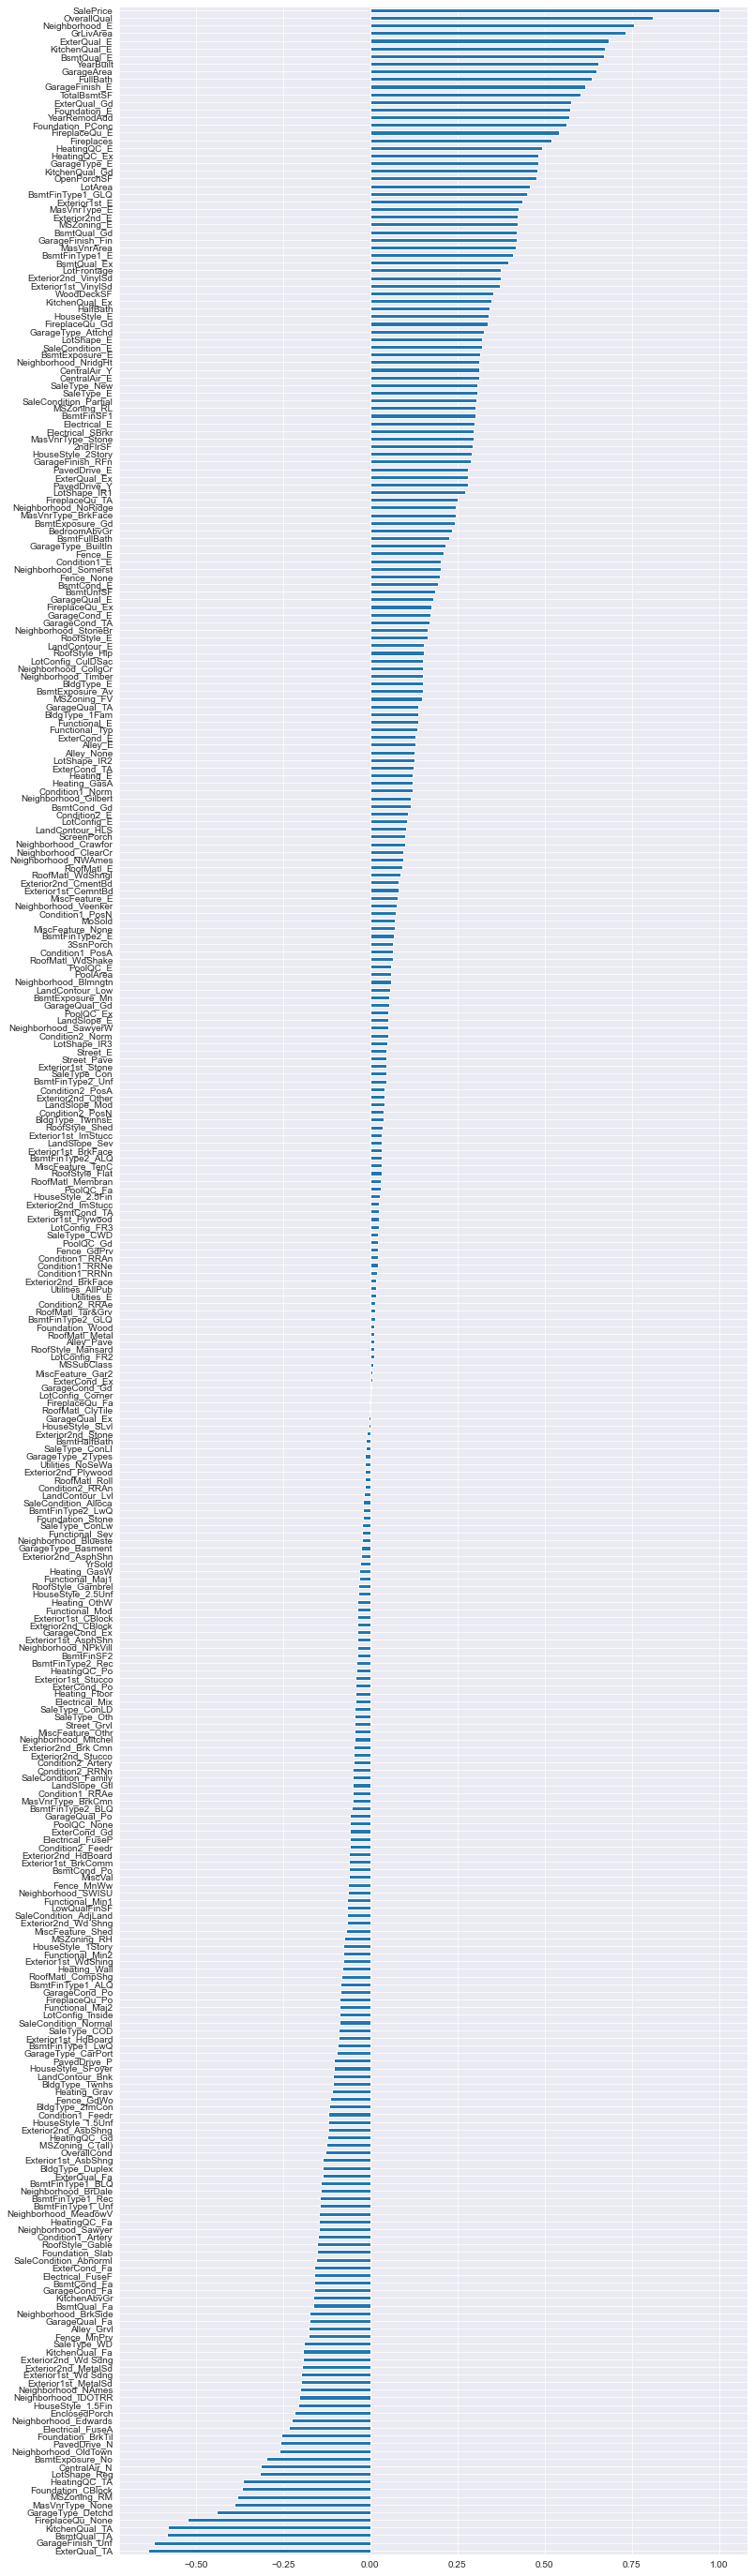

In [15]:
coors1 = df_total.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 50))
coors1.SalePrice.sort_values().plot.barh()

### Preparing the data for ML:

In [16]:
Train = df_total[df_total.SalePrice.notna()]
df_kaggle = df_total[df_total.SalePrice.isna()]

df_Xtrain = Train.drop('SalePrice', axis=1)
X_kaggle = df_kaggle.drop('SalePrice', axis=1)
df_ytrain = np.log1p(Train['SalePrice'])

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Applying Machine Learning</div></center>

In [17]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=56)
alphas = [5e-05, 0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 1, 10]

def rmse(model, X, y):
    return np.sqrt(mean_squared_error(y, model.predict(X)))

def cv_rmse(model, y=df_ytrain, X=df_Xtrain):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

### Linear Regression Models:

- Both **Lasso** (minimize: OLS + $\alpha \sum_{i=1}^{n}|a_{i}|$) and **Ridge** (minimize: OLS + $\alpha \sum_{i=1}^{n}a_{i}^{2}$) use regularization to penalize large coefficients and address overfitting.
- **RobustScaler**: is a data preprocessing technique used to handle outliers. It uses median and interquartile range (IQR) to scale the data, which makes it more robust to extreme values than other normalization techniques. RobustScaler is particularly useful for models that are sensitive to outliers.

In [18]:
model_lasso = make_pipeline(RobustScaler(), 
                            LassoCV(alphas=alphas, random_state=123, max_iter=1e7, cv=kfolds))

model_ridge = make_pipeline(RobustScaler(), 
                            RidgeCV(alphas=alphas, cv=kfolds))

model_lasso.fit(df_Xtrain, df_ytrain)
model_ridge.fit(df_Xtrain, df_ytrain)
print(f'Lasso: Rmse={cv_rmse(model_lasso).mean():.4f}\nRidge: Rmse={cv_rmse(model_ridge).mean():.4f}')

Lasso: Rmse=0.1419
Ridge: Rmse=0.1327


### GradientBoostingRegressor Model:

In [19]:
model_gbr = GradientBoostingRegressor(n_estimators=1500, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state =42)
model_gbr.fit(df_Xtrain, df_ytrain)
print(f'GradientBoostingRegressor: Rmse={cv_rmse(model_gbr).mean():.4f}')

GradientBoostingRegressor: Rmse=0.1225


### XGBRegressor Model:

In [20]:
model_xgboost = XGBRegressor(learning_rate=0.01,n_estimators=1500,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
model_xgboost.fit(df_Xtrain, df_ytrain)
print(f'XGBRegressor: Rmse={cv_rmse(model_xgboost).mean():.4f}')

XGBRegressor: Rmse=0.1231


### StackingCVRegressor Model:

In [21]:
model_stack_gen = StackingCVRegressor(regressors=(model_ridge, model_lasso, model_gbr, model_xgboost),
                                meta_regressor=model_xgboost,
                                use_features_in_secondary=True)
model_stack_gen.fit(df_Xtrain, df_ytrain)
print(f'StackingCVRegressor: Rmse={cv_rmse(model_stack_gen).mean():.4f}')

StackingCVRegressor: Rmse=0.1226


### Models predict:

In [22]:
def models_predict(X):
    return ((0.1 * model_ridge.predict(X)) + \
            (0.15 * model_lasso.predict(X)) + \
            (0.15 * model_gbr.predict(X)) + \
            (0.20 * model_xgboost.predict(X)) + \
            (0.40 * model_stack_gen.predict(np.array(X))))

In [23]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
print('RMSLE score on train data:')
print(f'{rmse(df_ytrain, models_predict(df_Xtrain)):.4f}')

RMSLE score on train data:
0.0707


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Submission</div></center>

In [24]:
y_kaggle = np.expm1(models_predict(X_kaggle))
output = pd.DataFrame({'Id': df_test.Id, 
                      'SalePrice':y_kaggle
                    })
output.to_csv('submission.csv', index=False)
output

,Id,SalePrice
0,1461,122926.750345
1,1462,157857.680866
2,1463,182727.537365
3,1464,195740.396146
4,1465,192360.997062
...,...,...
1454,2915,86484.821378
1455,2916,83957.662640
1456,2917,167193.459376
1457,2918,119980.665047
